checking for rough consistency with fig.11 of 2103.01964

In [1]:
from LIMxCMBL.init import *


In [2]:
kmin, kmax, nk = 1e-4, 1e1, 128
k = np.logspace(np.log10(kmin), np.log10(kmax), nk)
pk_lin = ccl.linear_matter_power(cosmo, k, 1)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from LIMxCMBL.kernels import *

In [5]:
def voxelComovingDepth(z, R):
    Hubb = h*100*ccl.background.h_over_h0(cosmo, 1./(z+1)) * (u.km/u.s/u.Mpc)
    result = cu.c / Hubb  # units length
    result *= (1.+z) / R
    return result

def pixelComovingArea(pixarea, z):
    return (pixarea/u.sr) * (ccl.comoving_radial_distance(cosmo, 1./(1+z))*u.Mpc)**2

In [6]:
def voxelComovingVolume(z, pixarea,  R=None):
    result = voxelComovingDepth(z, R=R)
    result *= pixelComovingArea(pixarea, z)
    return result

# CCAT Prime

In [7]:
zmin = 3.5
zmax = 8.1
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [8]:
##ccat prime
theta = 30*u.arcsec #theta fwhm
Omegapix = theta**2 / (8  * np.log(2))

In [9]:
Omegapix

<Quantity 162.3031921 arcsec2>

In [10]:
for idx in idxs[::300]:
    z = zs[idx]
    Vvox = voxelComovingVolume(z, Omegapix, R=100)
    Vvox = Vvox.to(u.Mpc**3)

    Pn_ccat = (5.7e4 *u.Jy / u.sr )**2 * Vvox
    Pn_ccat = Pn_ccat.to((u.kJy / u.sr)**2 * u.Mpc**3)
    print(Pn_ccat, z)
    
print(2.3e4)

22235.952800146893 kJy2 Mpc3 / sr2 3.5011874288481026
23367.327818812937 kJy2 Mpc3 / sr2 3.9294627894877356
24392.20458607693 kJy2 Mpc3 / sr2 4.420615271169518
25297.42783926739 kJy2 Mpc3 / sr2 4.987839988491326
26069.868595582328 kJy2 Mpc3 / sr2 5.647948972125678
26696.599776754225 kJy2 Mpc3 / sr2 6.422634395181787
27164.69617823313 kJy2 Mpc3 / sr2 7.340278424214837
23000.0


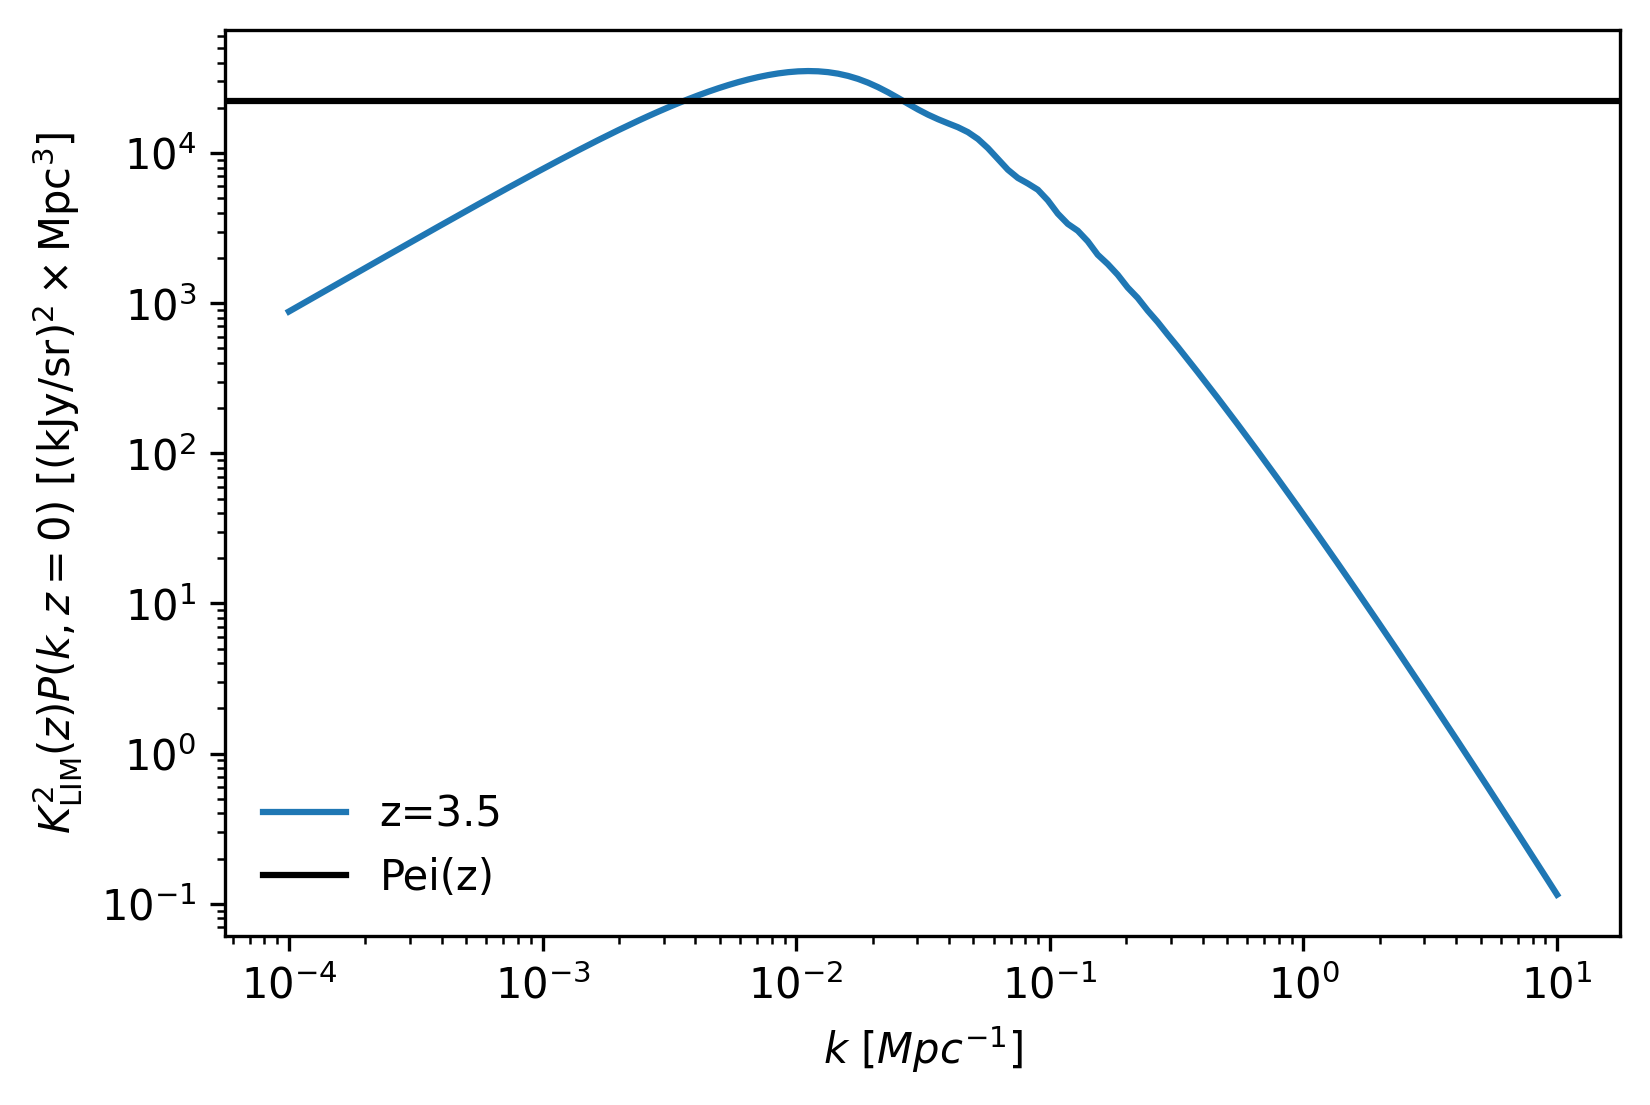

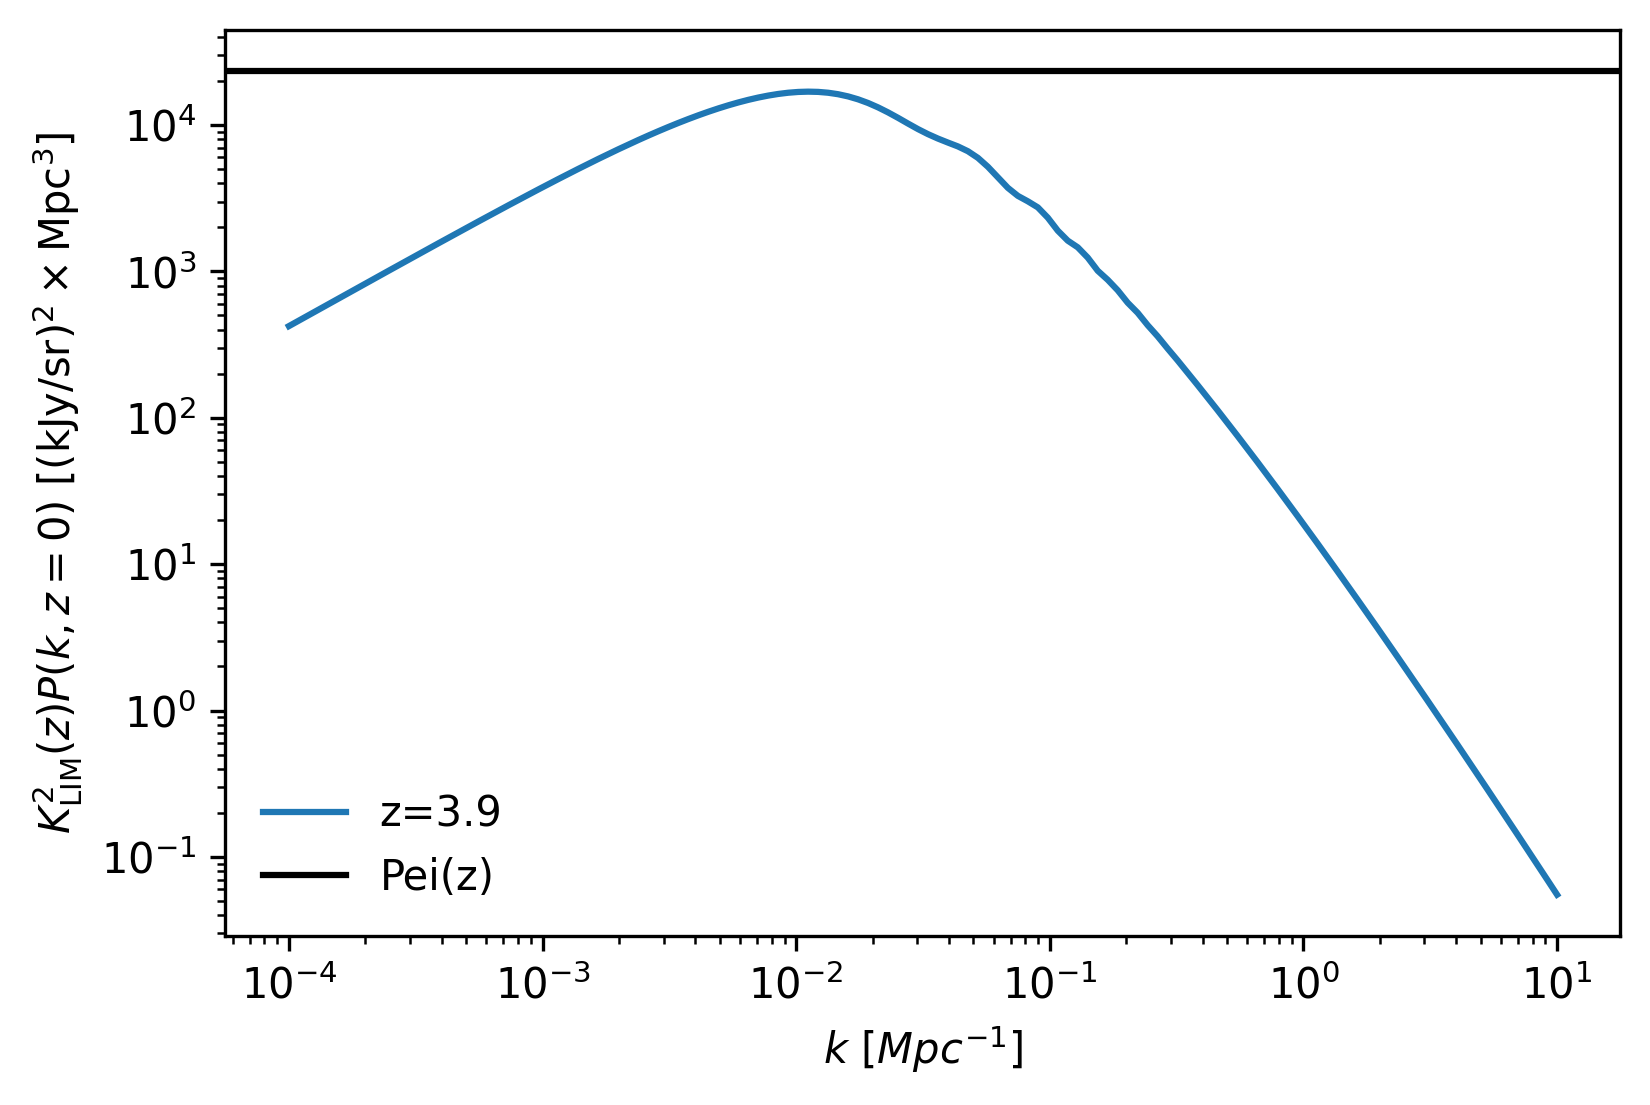

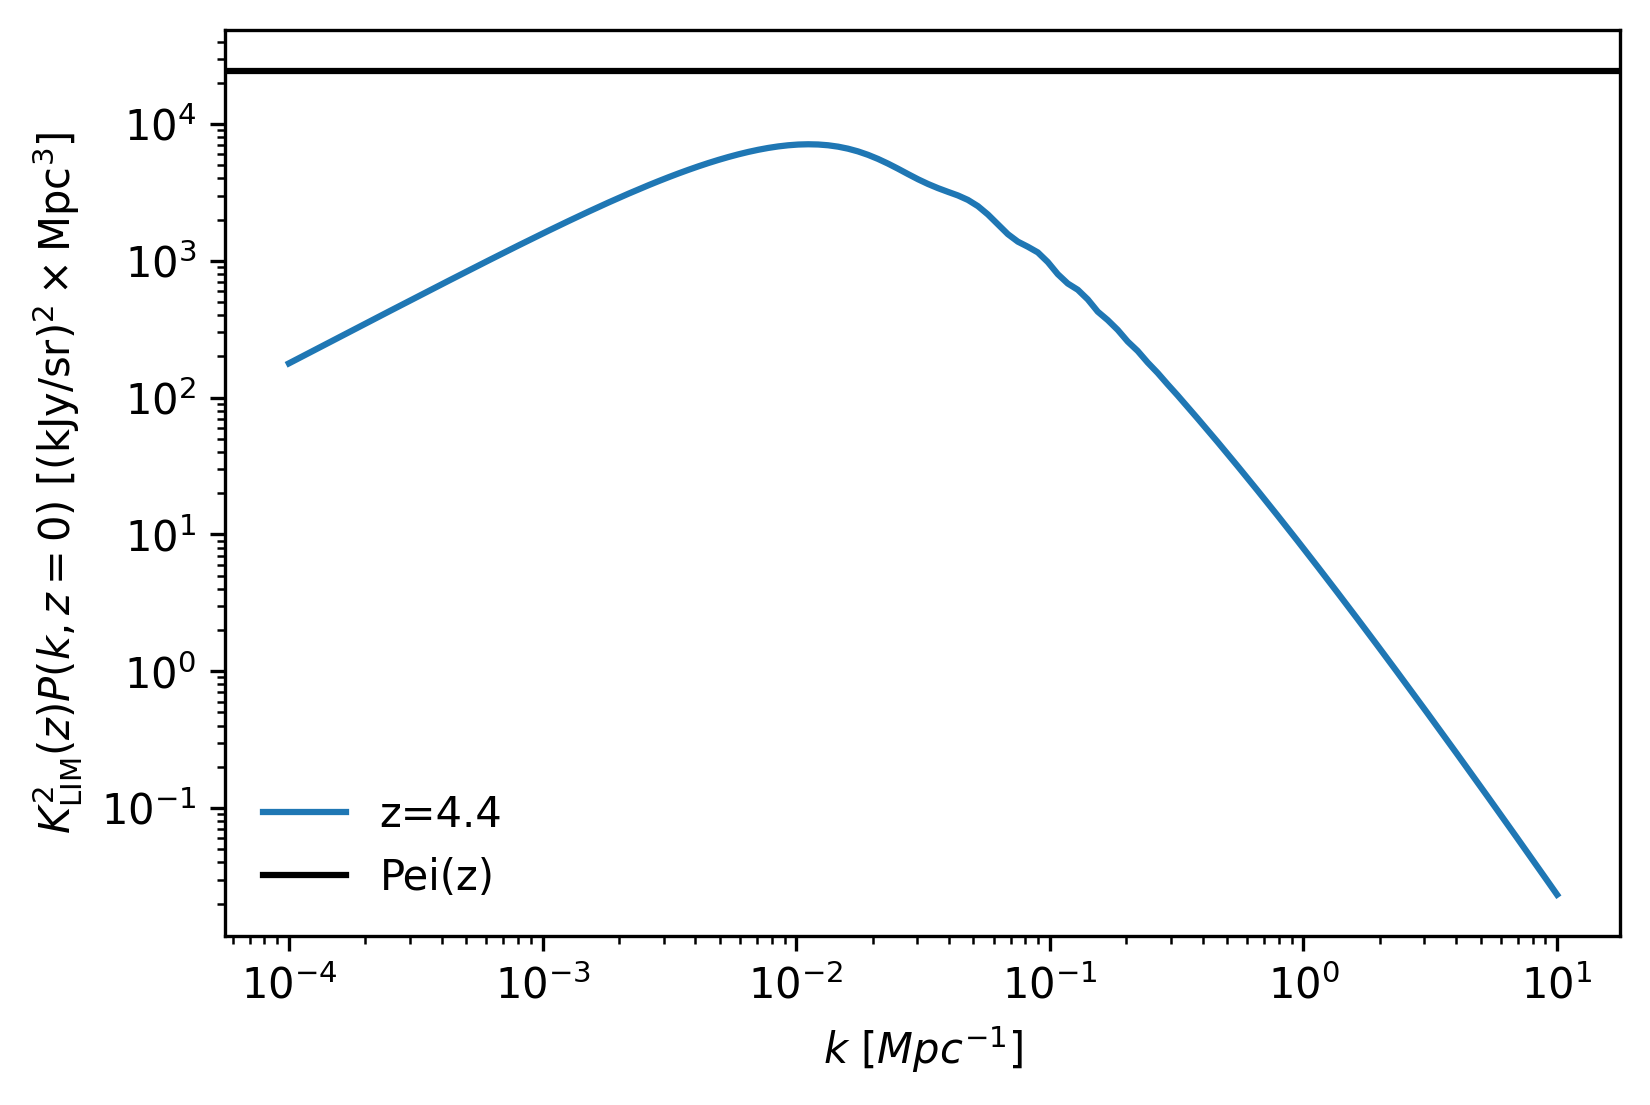

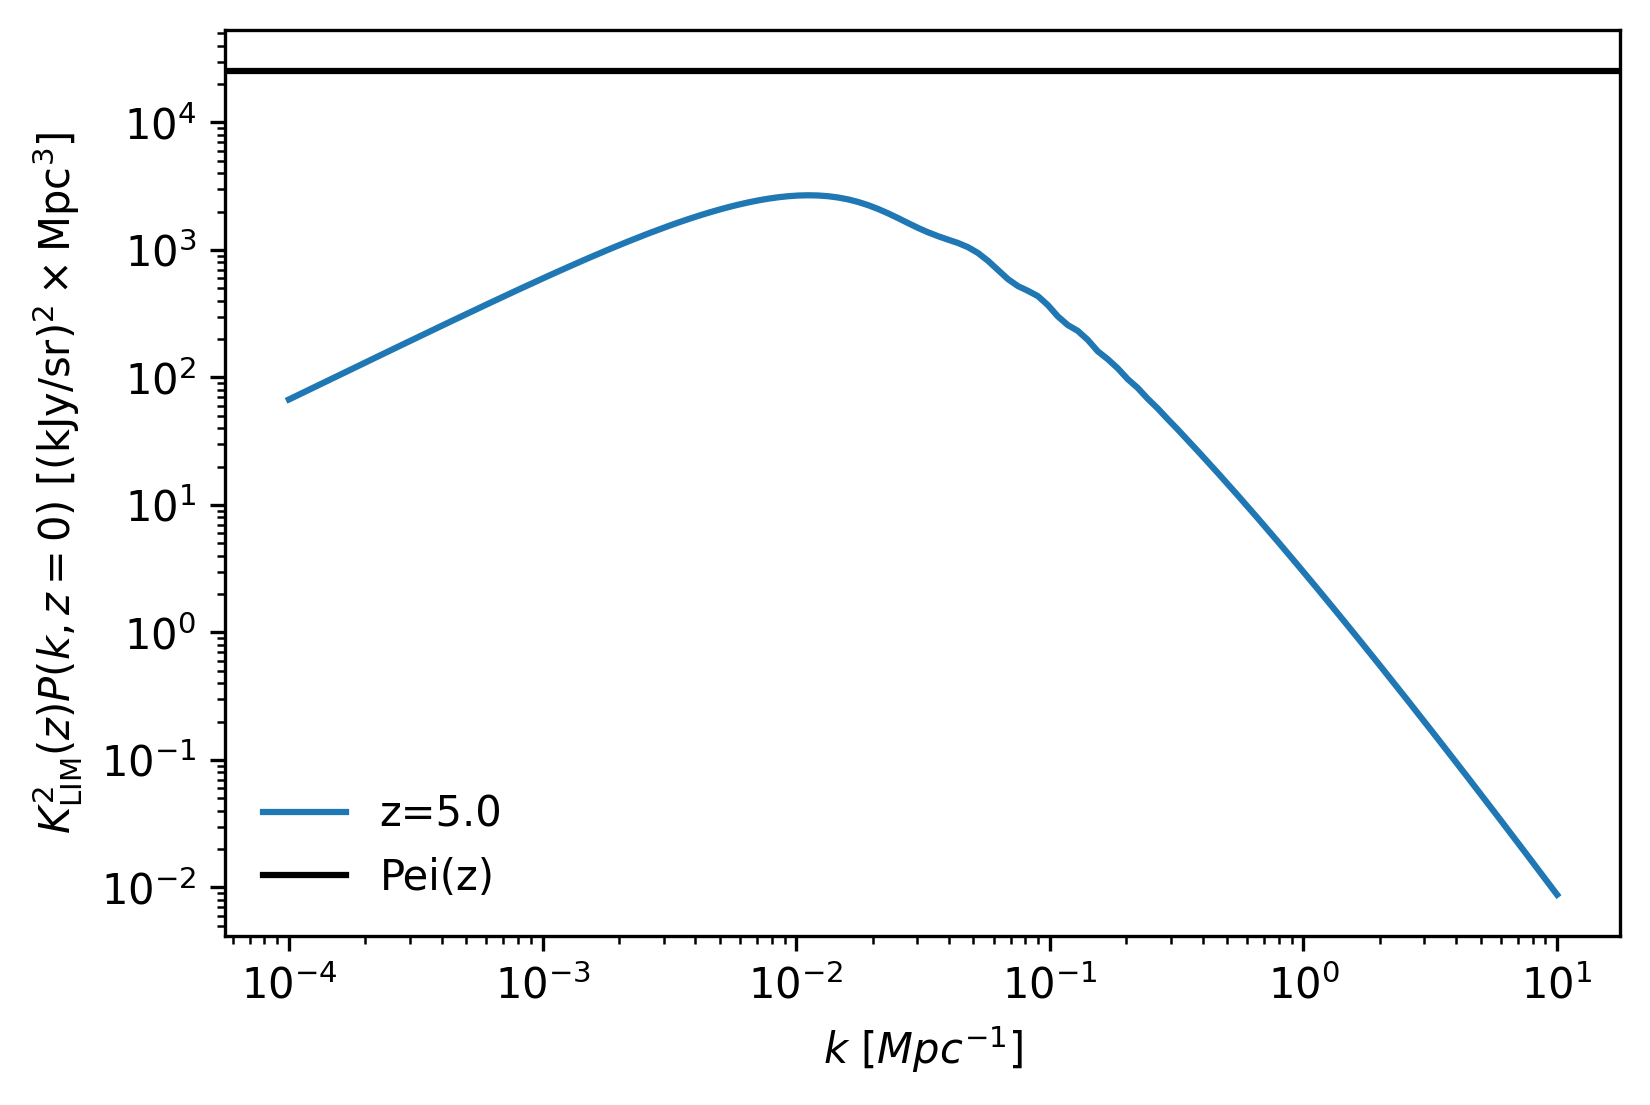

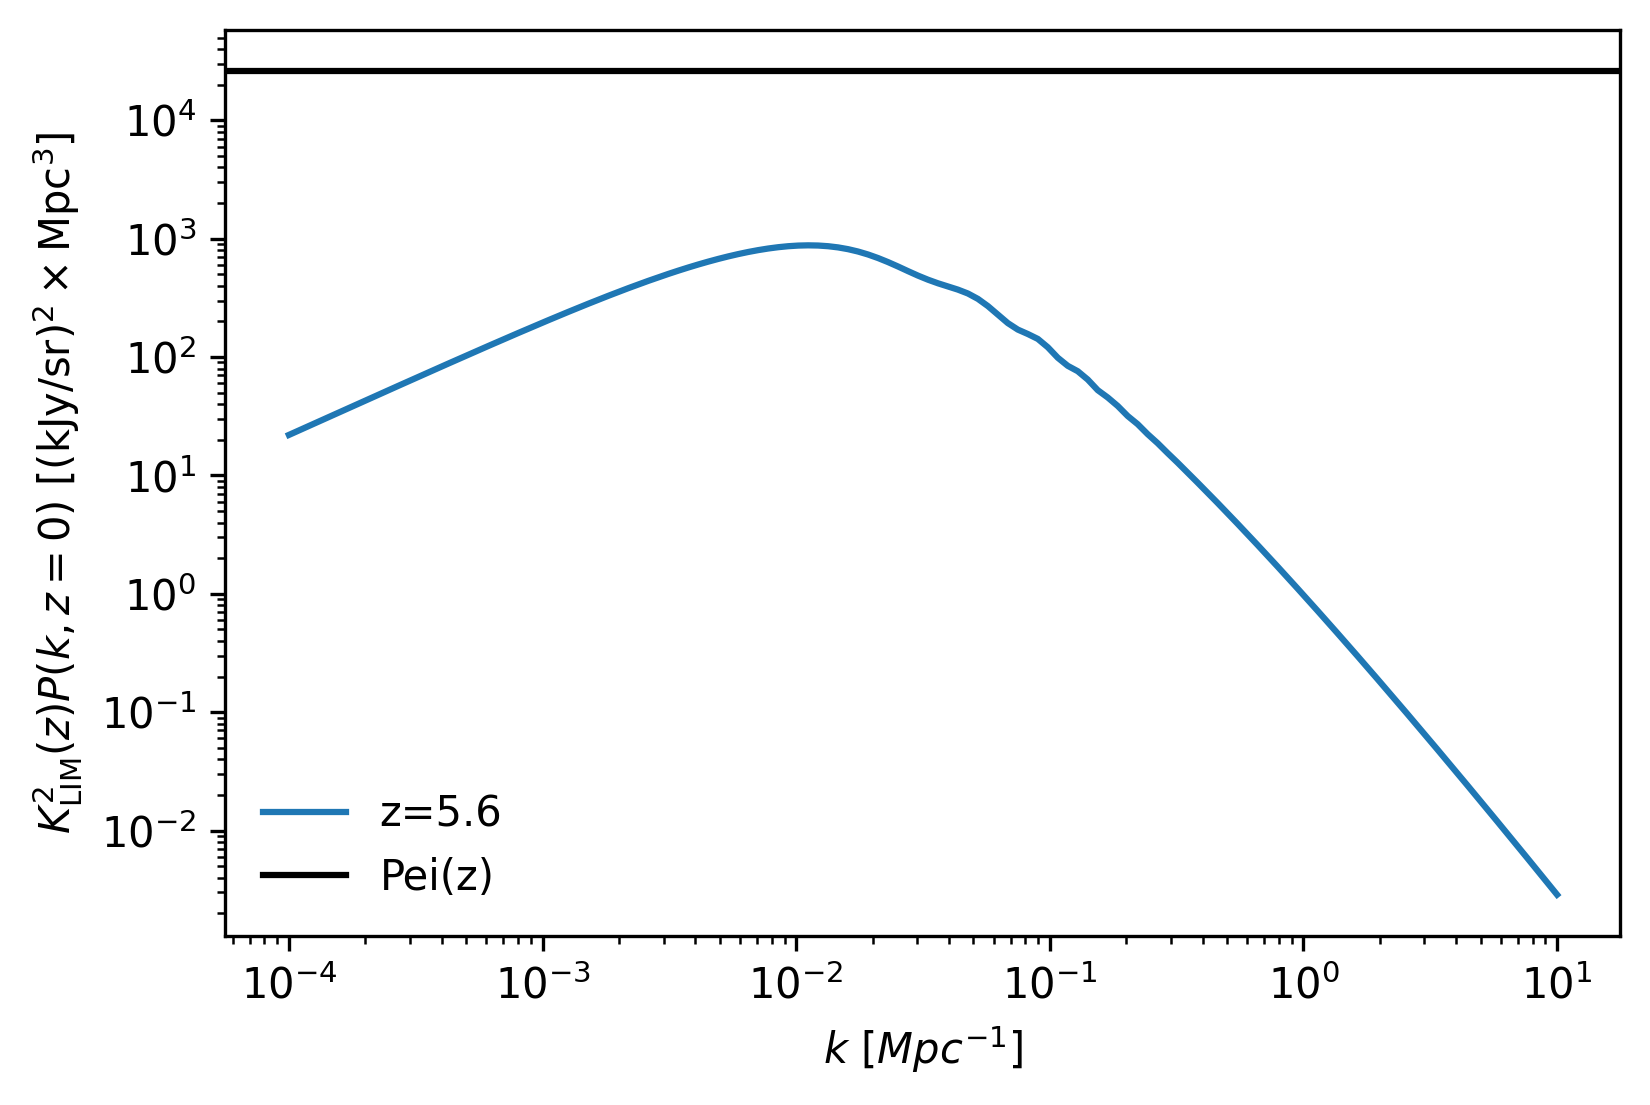

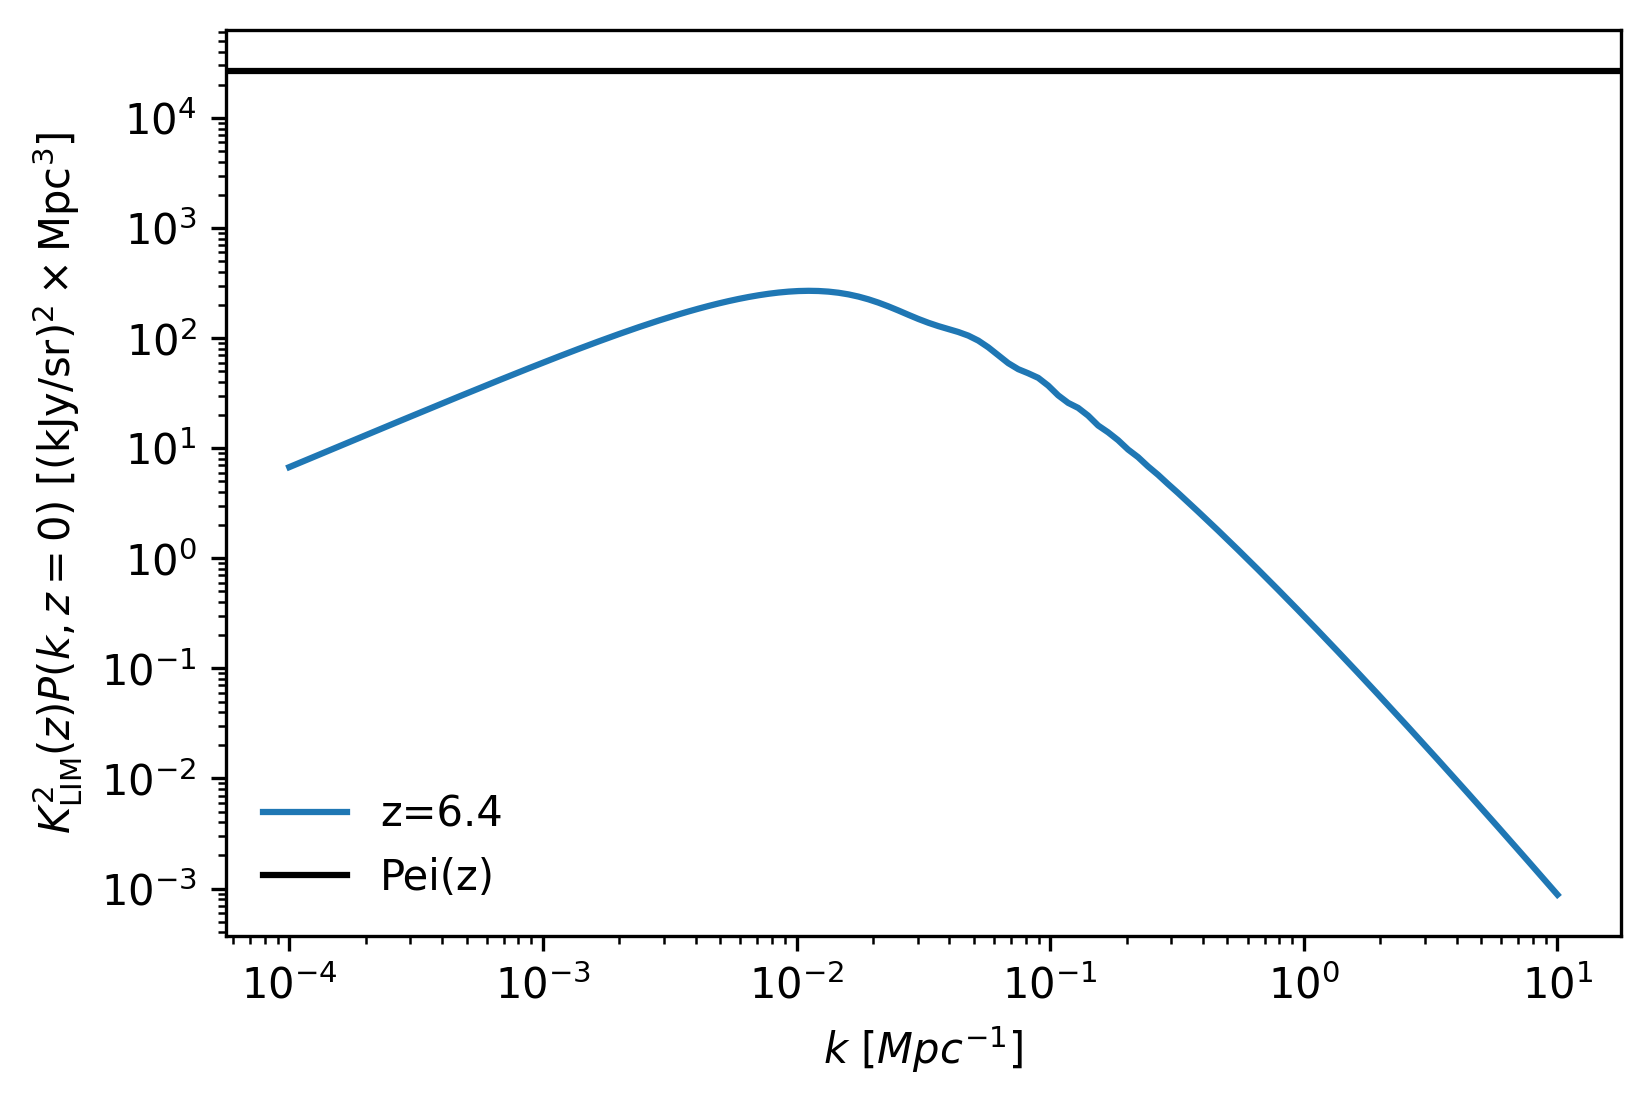

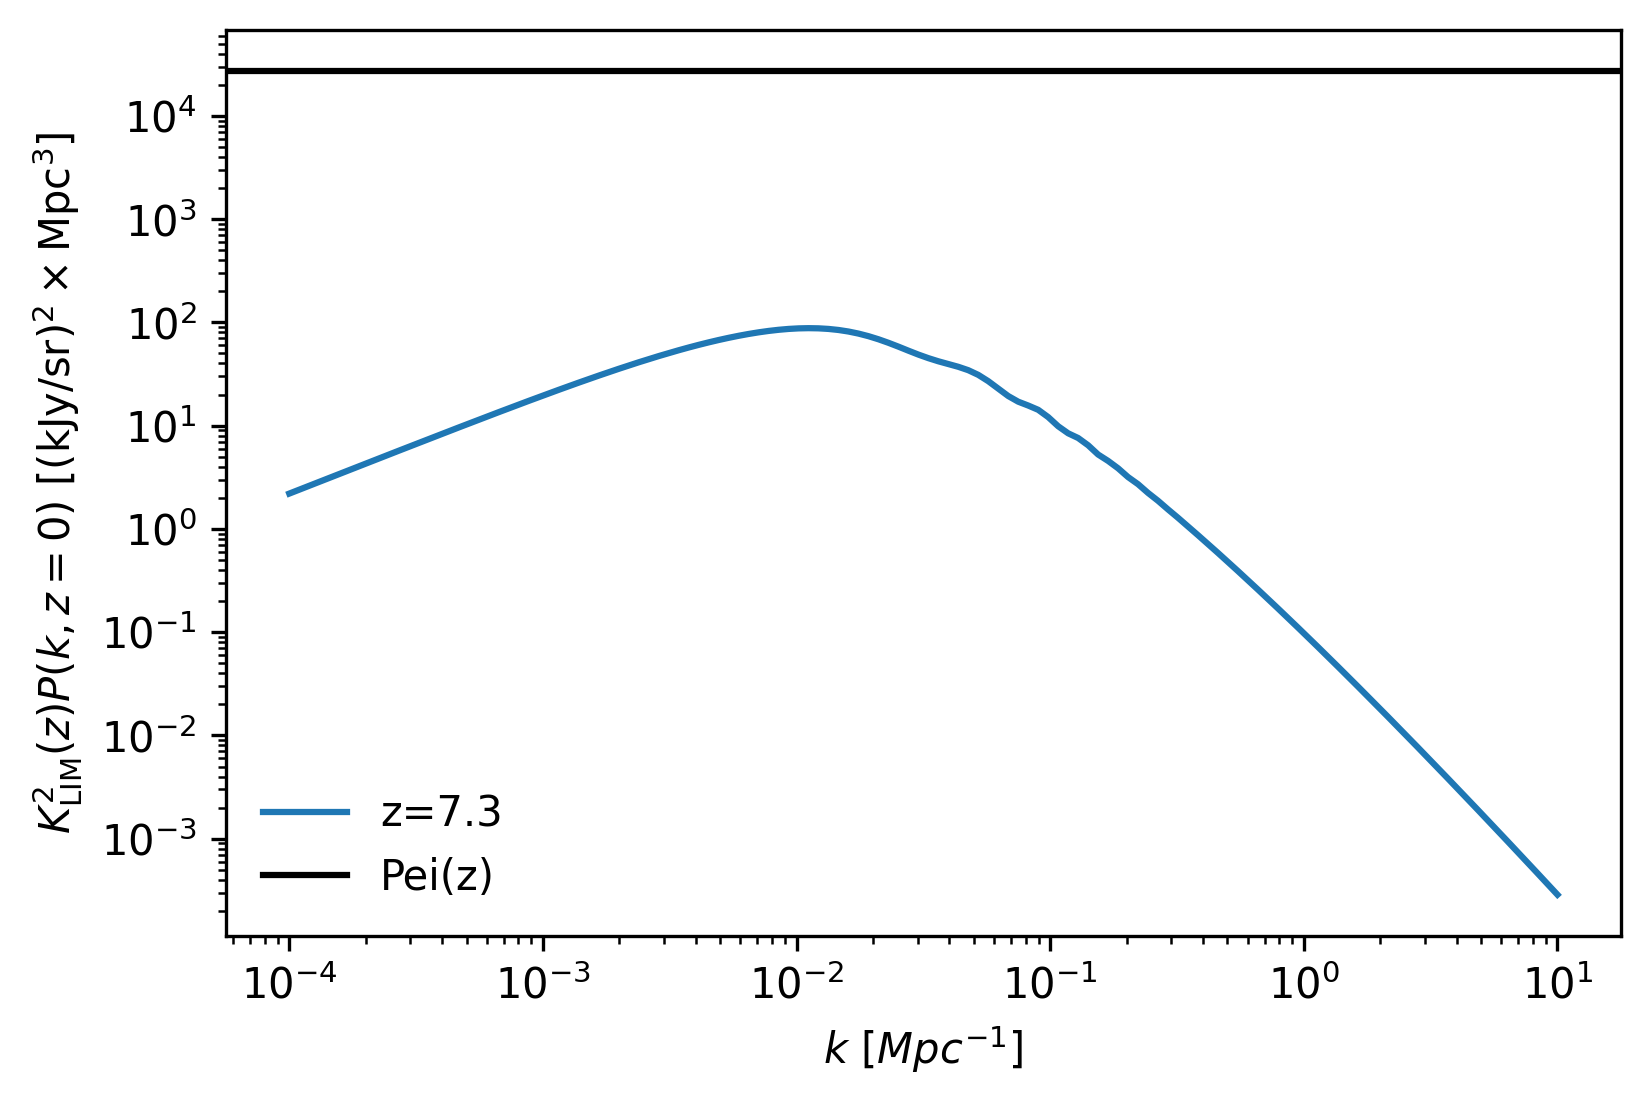

In [11]:
for idx in idxs[::300]:
    plt.figure(dpi = 300)
    z = zs[idx]
    Vvox = voxelComovingVolume(z, Omegapix, R=100)
    Vvox = Vvox.to(u.Mpc**3)

    Pn_ccat = (5.7e4 *u.Jy / u.sr )**2 * Vvox
    Pn_ccat = Pn_ccat.to((u.kJy / u.sr)**2 * u.Mpc**3)
    
    plt.plot(k, KI[idx]**2 * pk_lin, label='z=%.1f'%(z))
    plt.axhline(np.array(Pn_ccat), label='Pei(z)', c='k')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$k\ [Mpc^{-1}]$', )
    plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (kJy/sr)^2\times Mpc}^3]$', )
    plt.legend(frameon=False)


    plt.show()

# COMAP

adapted from https://github.com/EmmanuelSchaan/HaloGen/blob/LIM/lim_specs.py

In [12]:
#Li Wechsler+ 16 1503.08833 Table 1
R = 800
theta = 6*u.arcmin #theta fwhm
Omegapix = theta**2 / (8  * np.log(2))
Omegasurv = 2.5 * u.deg**2
tObs = 1500 * u.hr

In [13]:
# observing time per pixel [s]
tPixel = tObs * Omegapix / Omegasurv
Tsys = 40 * u.K # system temperature [K]

nFeed = 19.  # number of feeds
dnu = 40 * u.MHz # spectral element width [Hz]
nuCenter = 32 * u.GHz  # 30-34GHz is the COMAP band [Hz]

# radiometer equation (App C1 in Li Wechsler+16)
# giving the pixel noise standard deviation [K]
# and convert with Rayleigh Jeans
sigmaIPixel = (2. * nuCenter**2 * cu.k_B
               * Tsys / np.sqrt(nFeed * dnu * tPixel) # [K]
               / cu.c**2) / u.sr
sigmaIPixel = (sigmaIPixel).to(u.kJy/u.sr)

In [14]:
sigmaIPixel

<Quantity 0.73140154 kJy / sr>

In [15]:
zmin = 2.4
zmax = 3.4
idxs = np.where((zs < zmax) & (zs>zmin))[0]

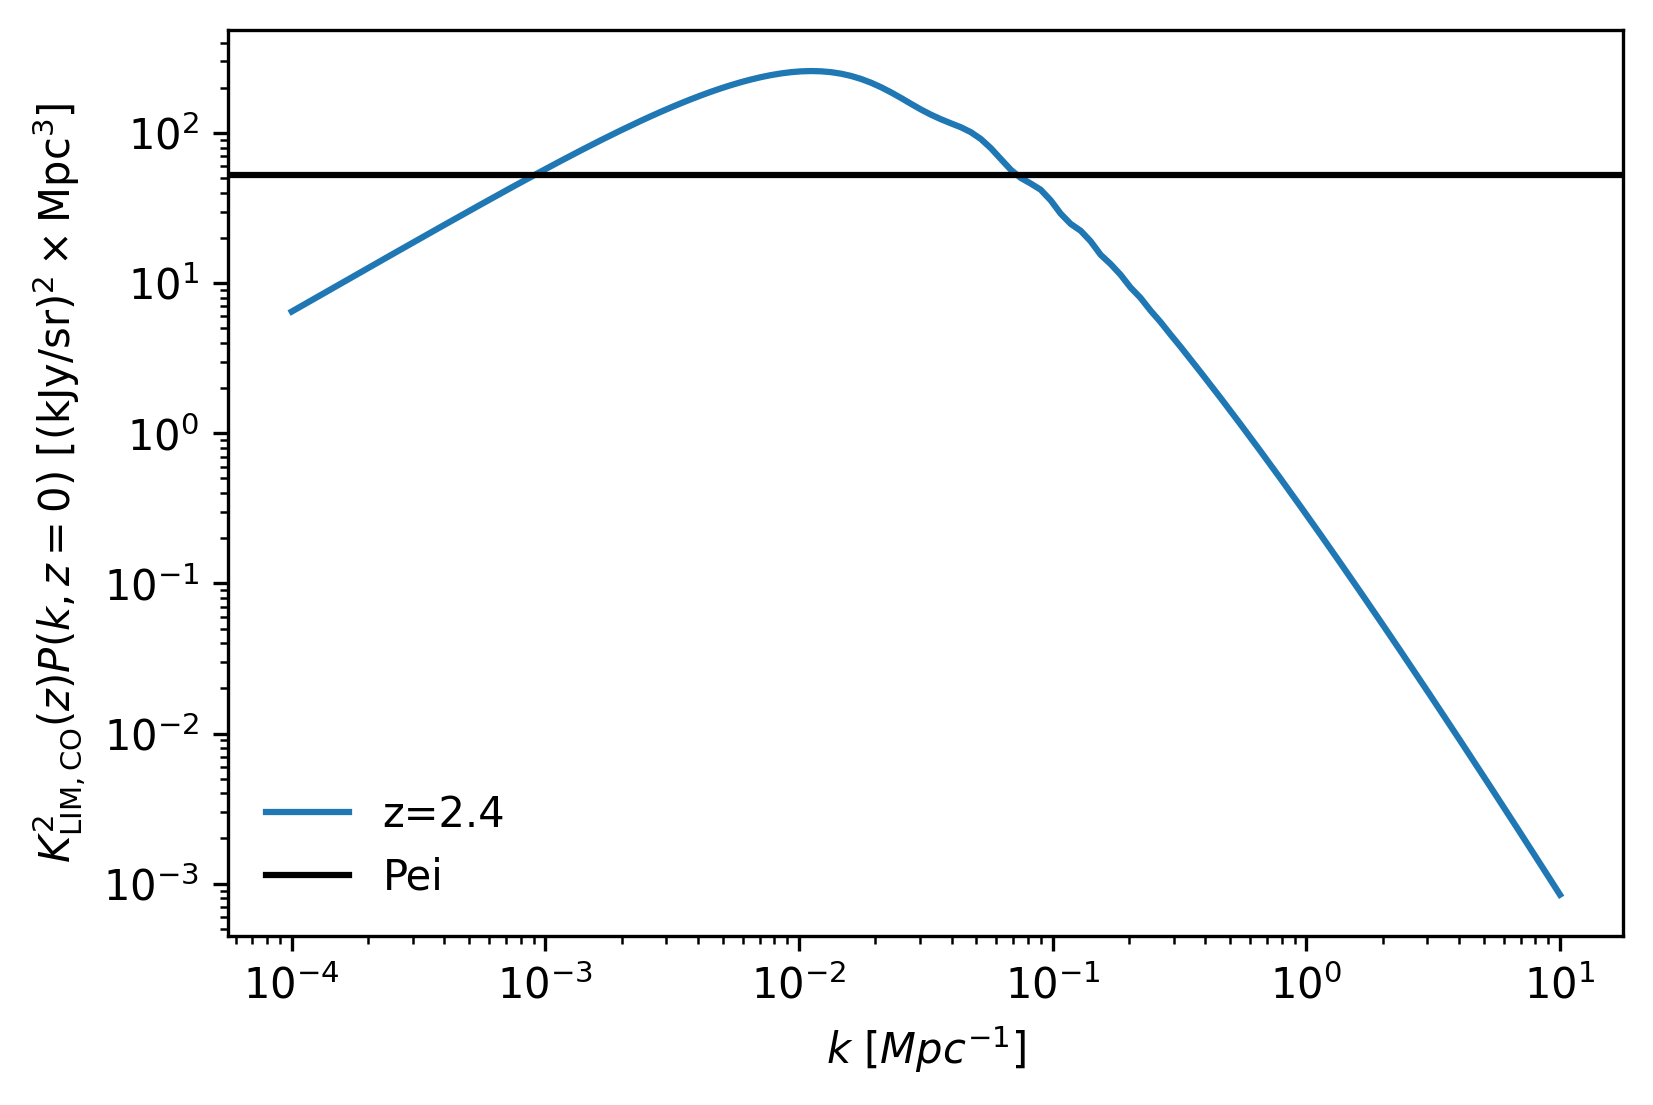

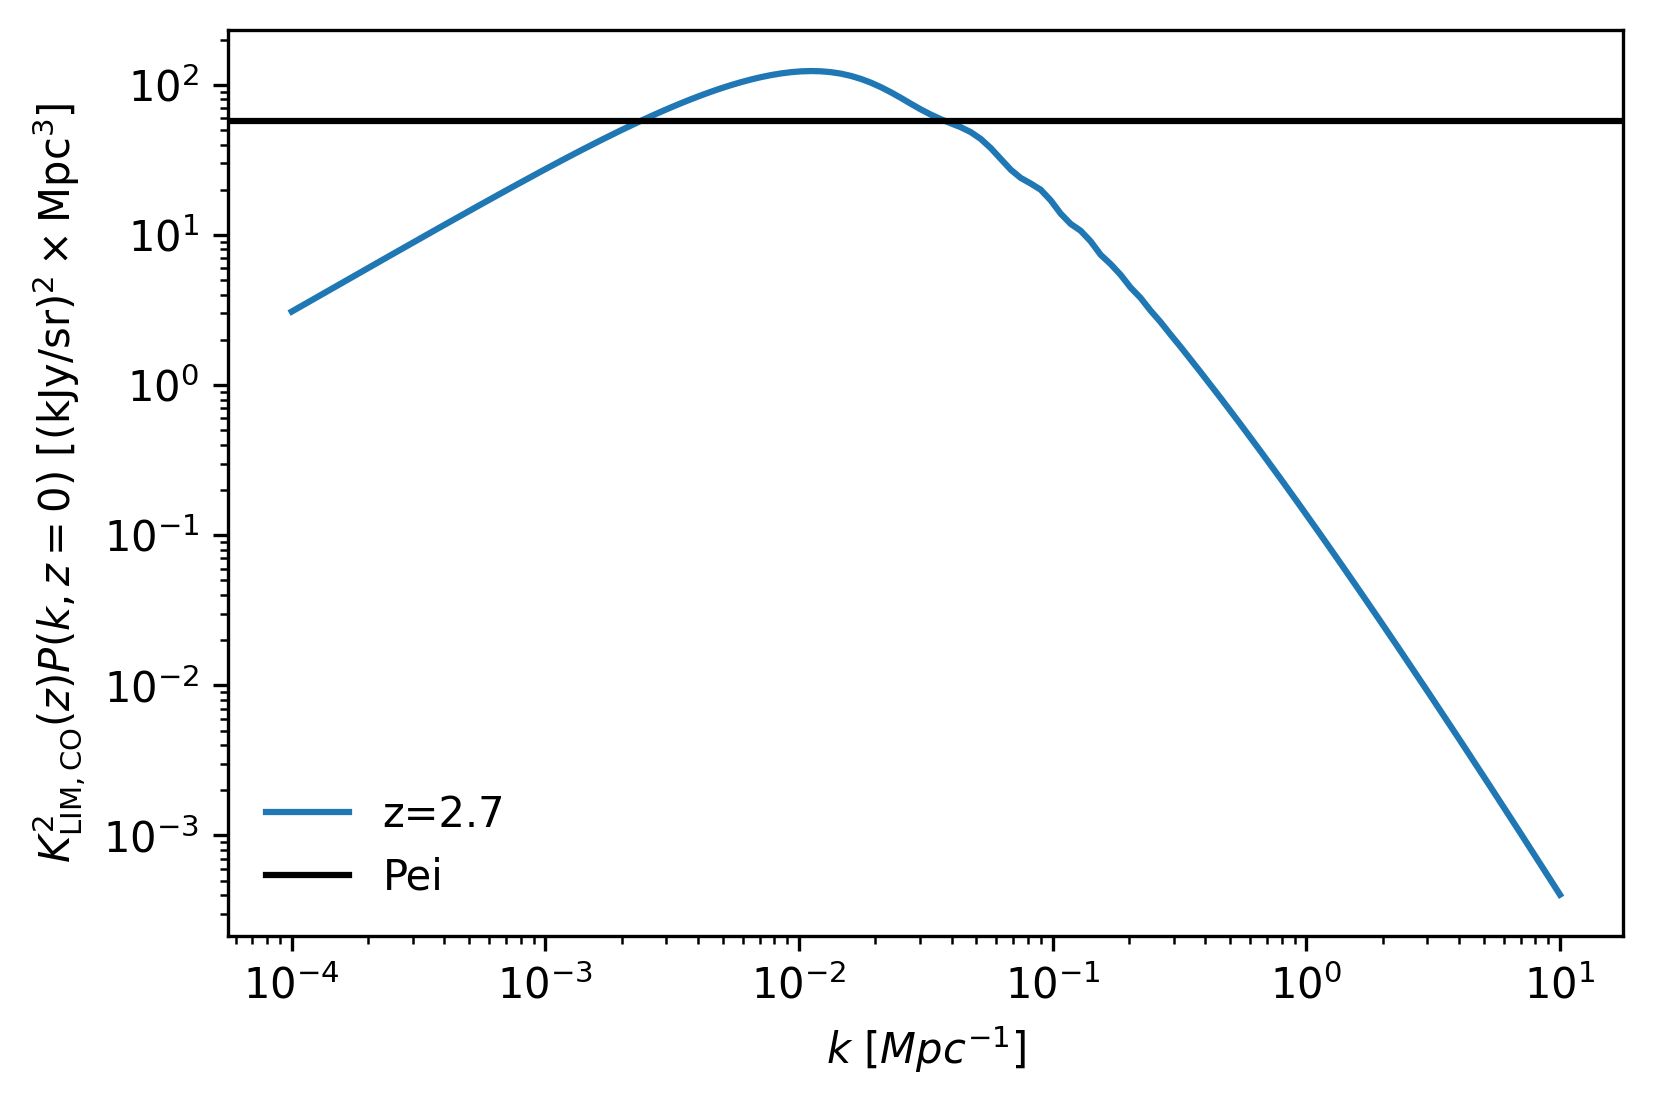

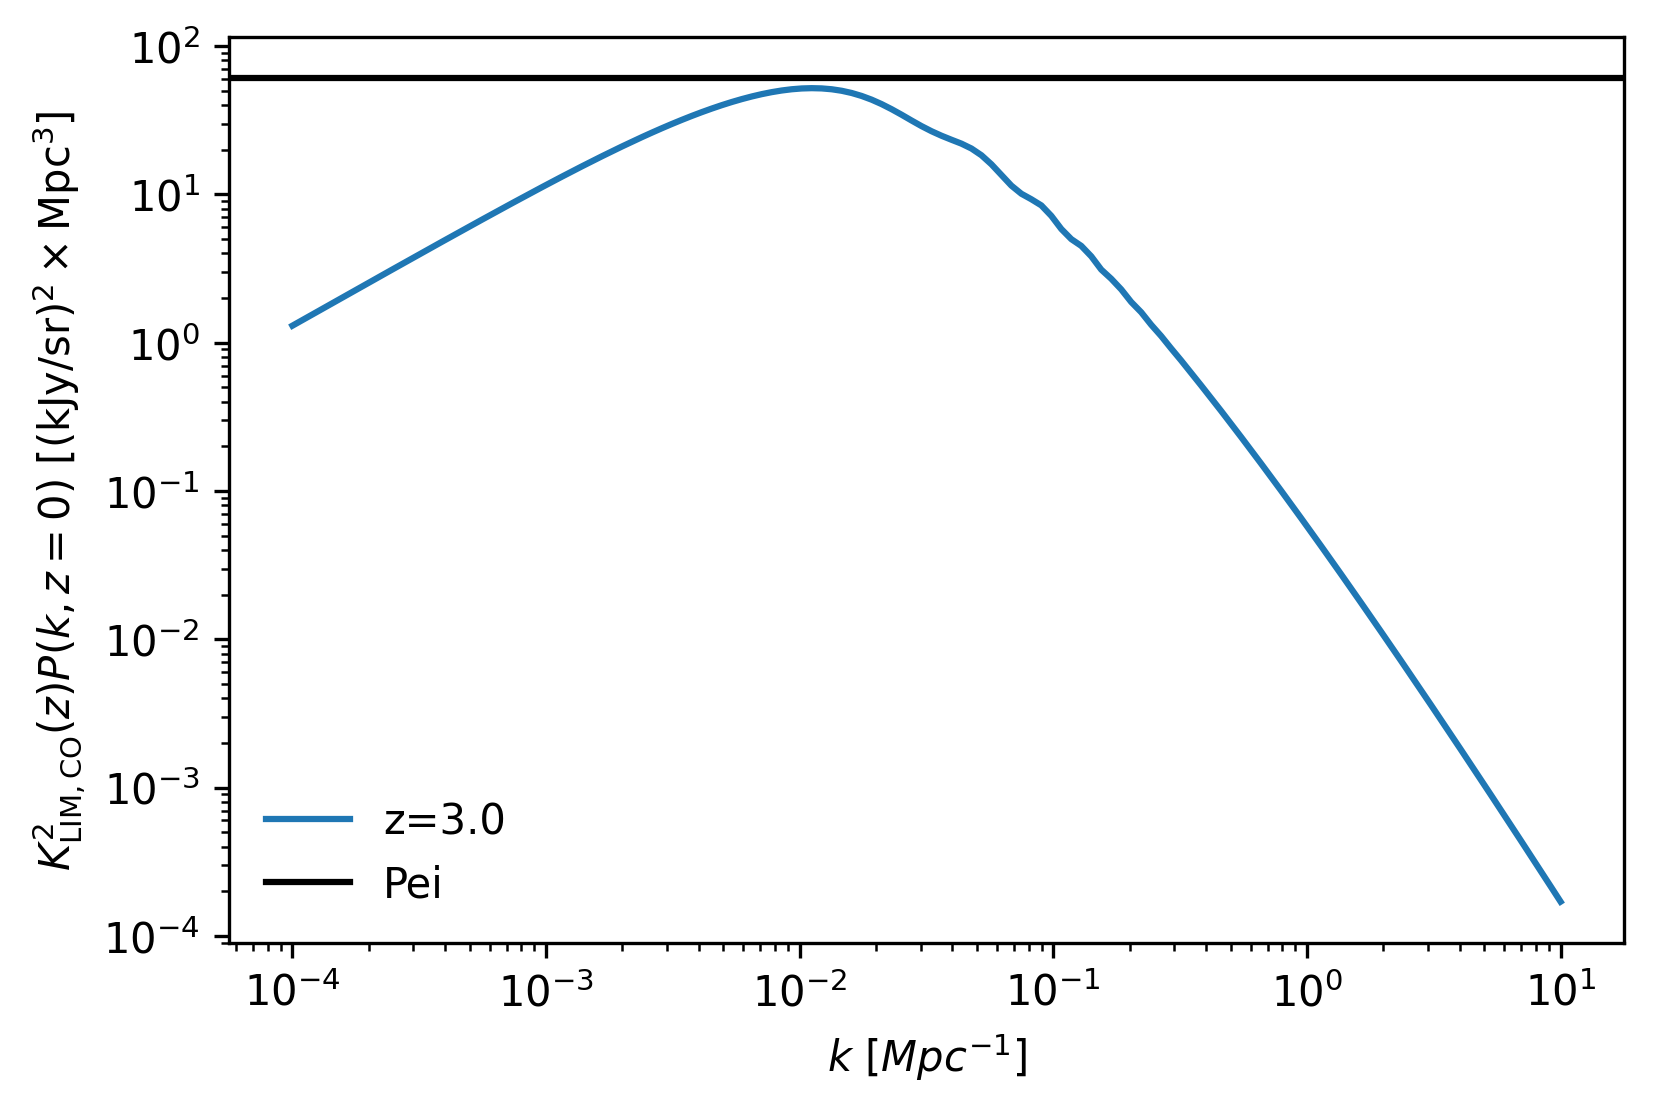

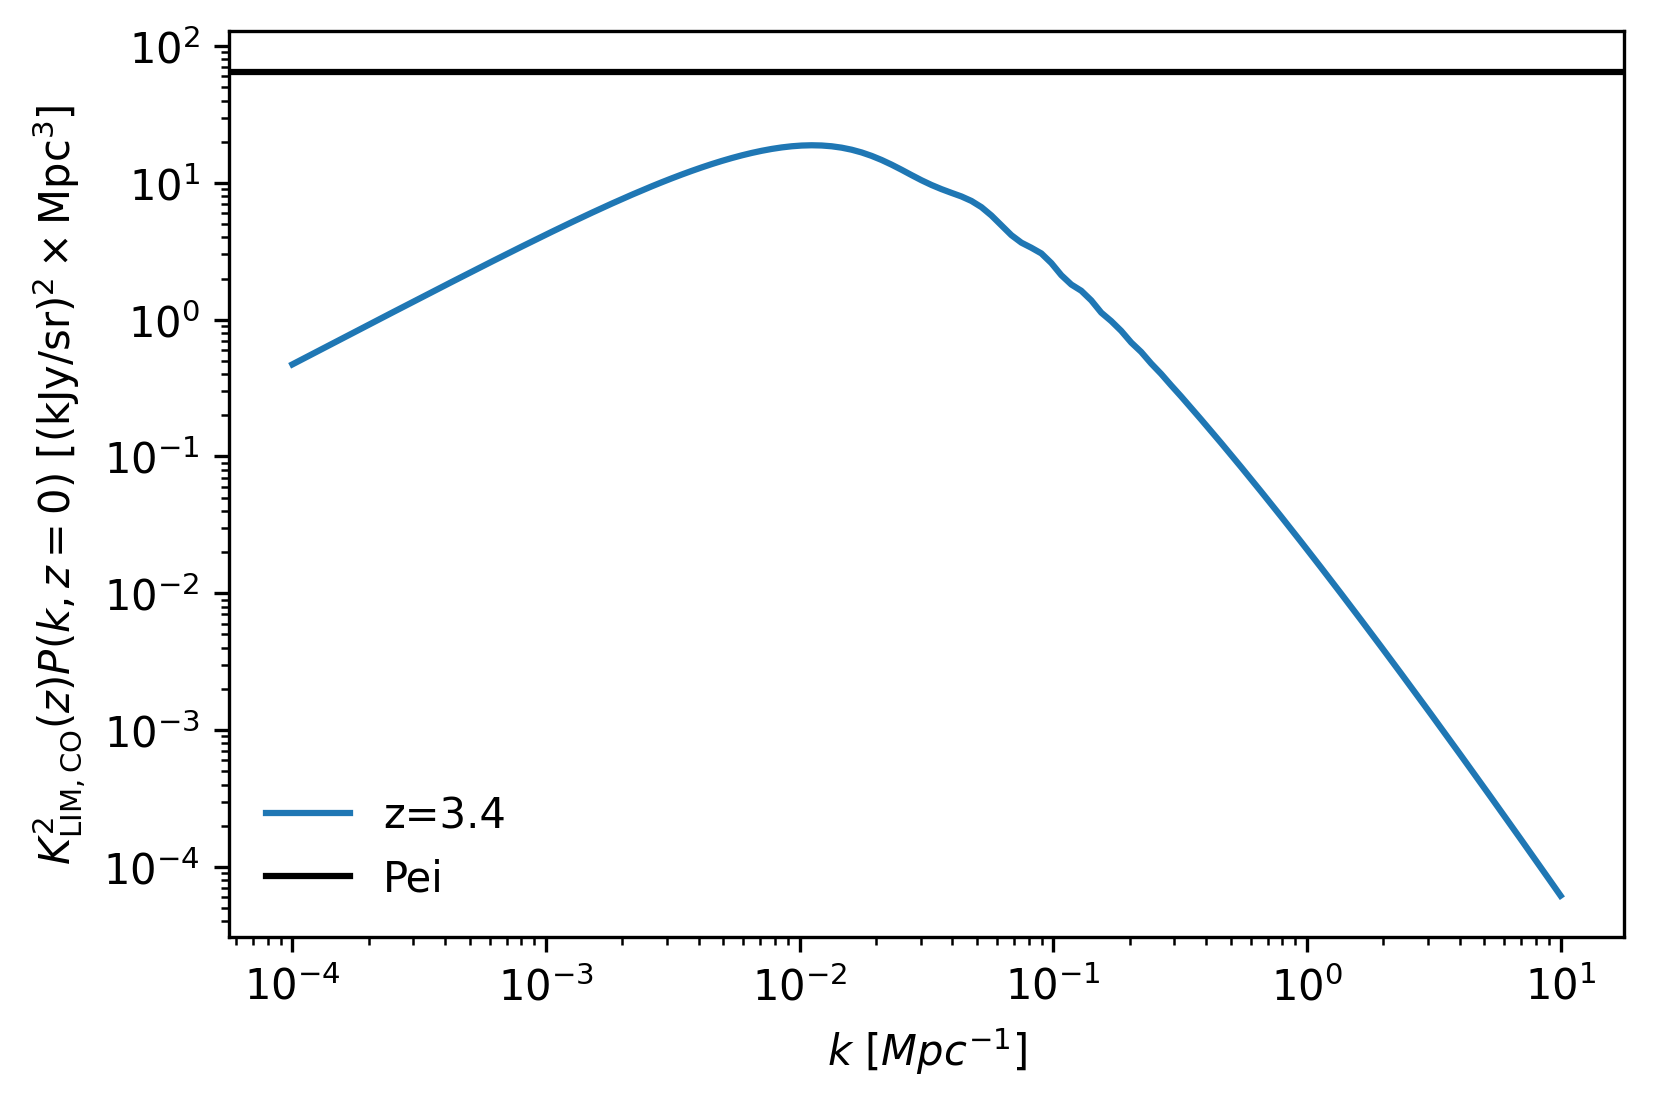

In [18]:
for idx in idxs[::300]:
    plt.figure(dpi = 300)
    z = zs[idx]    
    plt.plot(k, KI_CO[idx]**2 * pk_lin, label='z=%.1f'%(z))
    
    Pei = sigmaIPixel**2 * voxelComovingVolume(z, Omegapix, R=R)
    Pei = Pei.to(u.kJy**2 / u.sr**2 * u.Mpc**3)
    plt.axhline(np.array(Pei), c='k', label='Pei')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$k\ [Mpc^{-1}]$', )
    plt.ylabel(r'$K_{\rm LIM,CO}^2(z)P(k, z=0)\ [{\rm (kJy/sr)^2\times Mpc}^3]$', )
    plt.legend(frameon=False)


    plt.show()